## Importing Libraries

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

sns.set(rc={'figure.figsize':(12,10)})

## Loading dataset

In [5]:
data=pd.read_csv(r'C:\Users\prerana\Downloads\titanic_data.csv')

In [7]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<b>Types of Features</b>
<ul>
    <li><b>Categorical</b>-Sex and Embarked</li>
    <li>"<i>Continuous</i>"-Age,Fare</li>
    <li><b>Discrete</b>-SibSp,Parch</li>
    <li><b>Alphanumeric</b>-Cabin</li>
</ul>

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Numerical value analysis

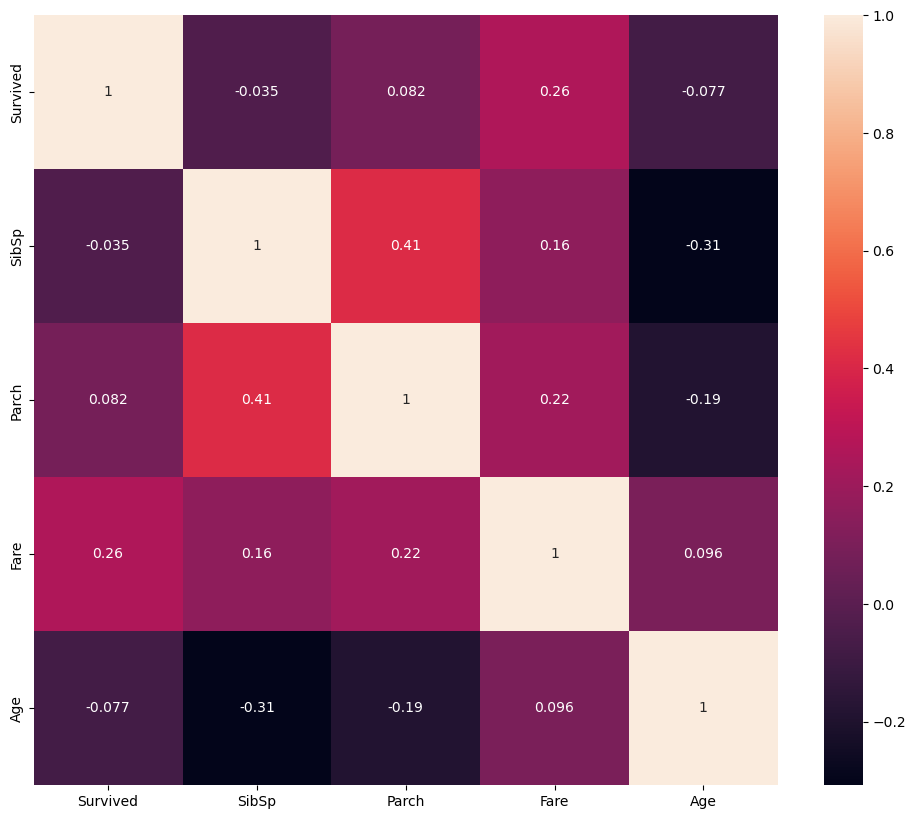

In [24]:
plt.figure(figsize=(12,10))
heatmap=sns.heatmap(data[['Survived','SibSp','Parch','Fare','Age']].corr(),annot=True)

## <font color='green'>sibsp - number of siblings / spouses aboard the titanic </font>

In [29]:
data['SibSp'].nunique()

7

In [31]:
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

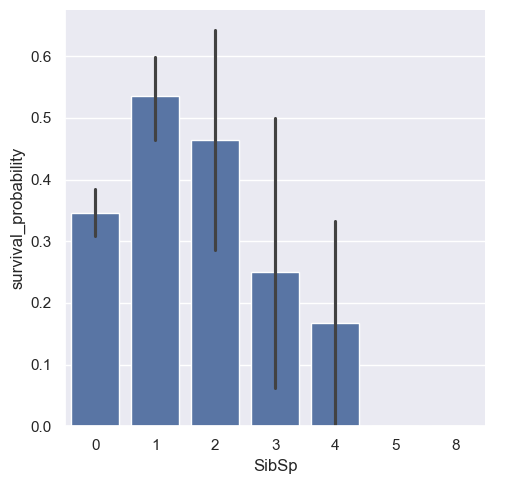

In [45]:
sns.catplot(x='SibSp',y='Survived',data=data,kind='bar').set_ylabels('survival_probability')

## <font color='green'>Age</font>

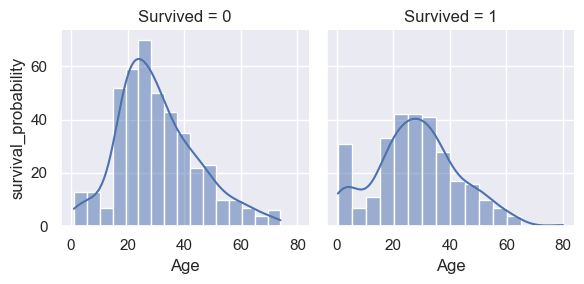

In [56]:
age_visual=sns.FacetGrid(data,col='Survived')
age_visual.map(sns.histplot,'Age',kde=True).set_ylabels('survival_probability')

## <font color='green'>Sex</font>

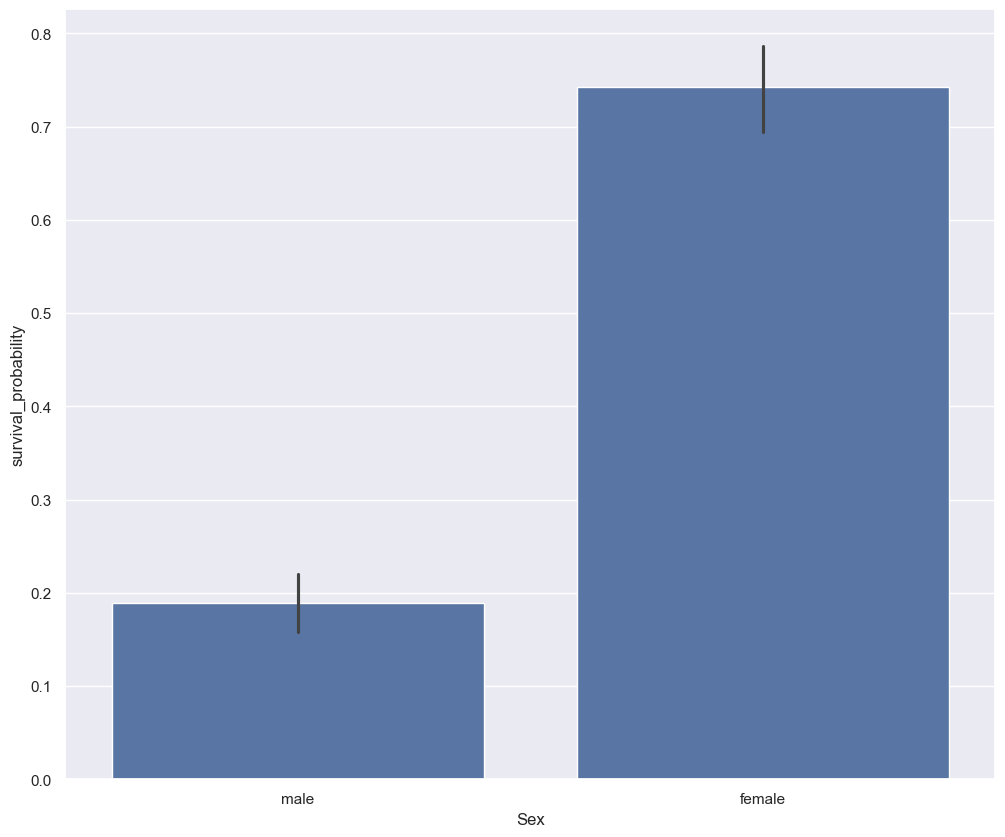

In [59]:
age_plot=sns.barplot(x='Sex',y='Survived',data=data).set_ylabel('survival_probability')

In [61]:
data[['Sex','Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


## <font color='green'>Pclass</font>

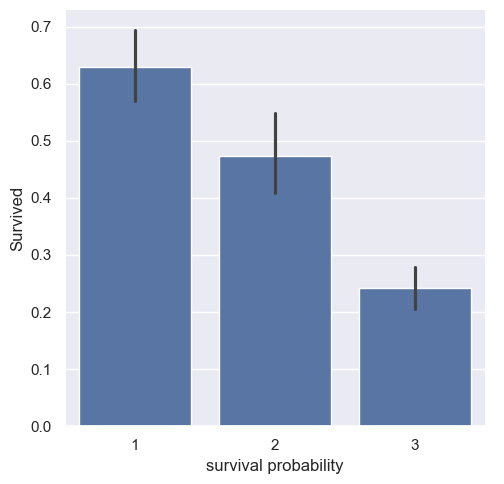

In [72]:
pclass=sns.catplot(x='Pclass',y='Survived',data=data,kind='bar').set_xlabels('survival probability')

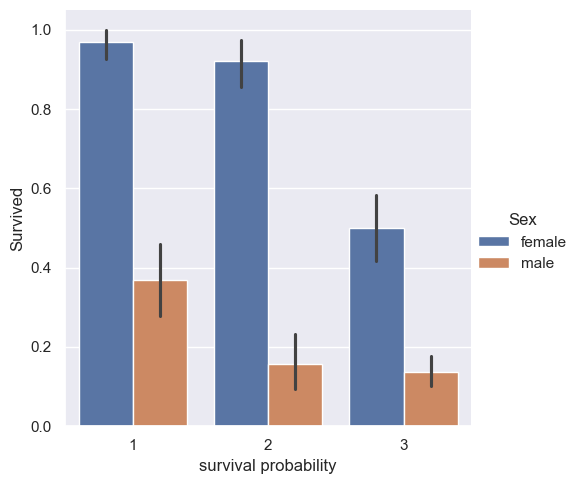

In [76]:
pclass=sns.catplot(x='Pclass',y='Survived',data=data,kind='bar',hue='Sex').set_xlabels('survival probability')

## <font color='green'>Embarked</font>

In [79]:
data['Embarked'].isnull().sum()

2

In [81]:
data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [83]:
data['Embarked']=data['Embarked'].fillna('S')

In [85]:
data['Embarked'].isnull().sum()

0

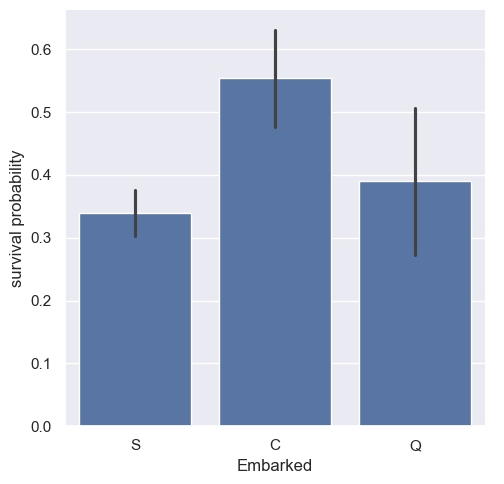

In [87]:
g=sns.catplot(x='Embarked',y='Survived',data=data,kind='bar').set_ylabels('survival probability')

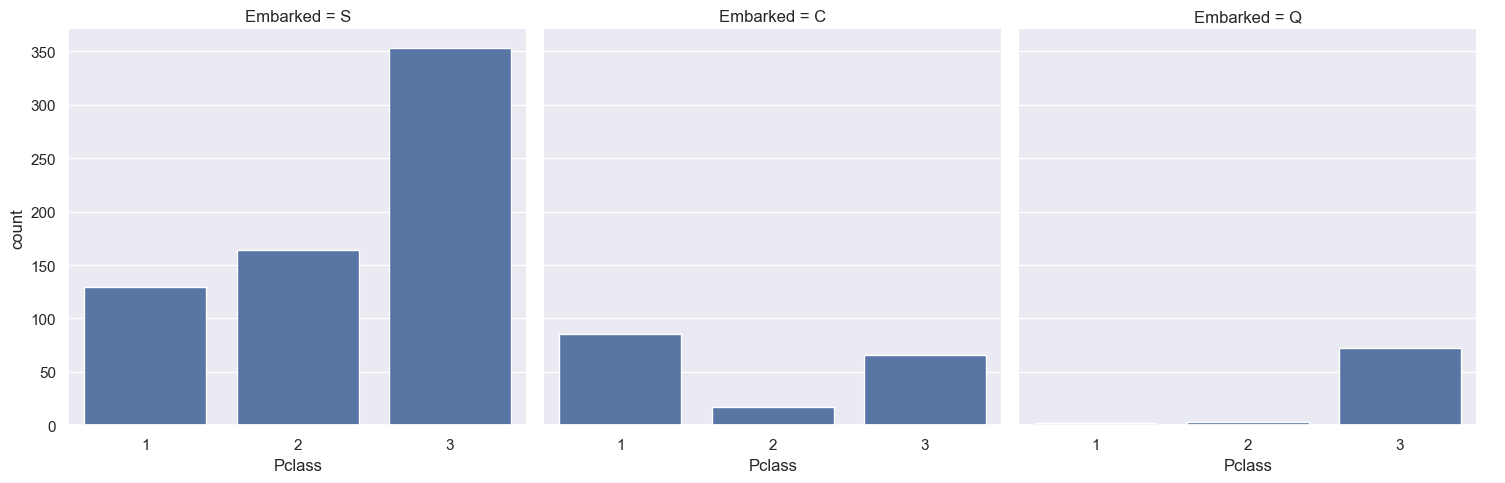

In [95]:
#explore pclass vs embarked
g=sns.catplot(x='Pclass',col='Embarked',data=data,kind='count')
g.despine(left=True)
g.set_ylabels('count')

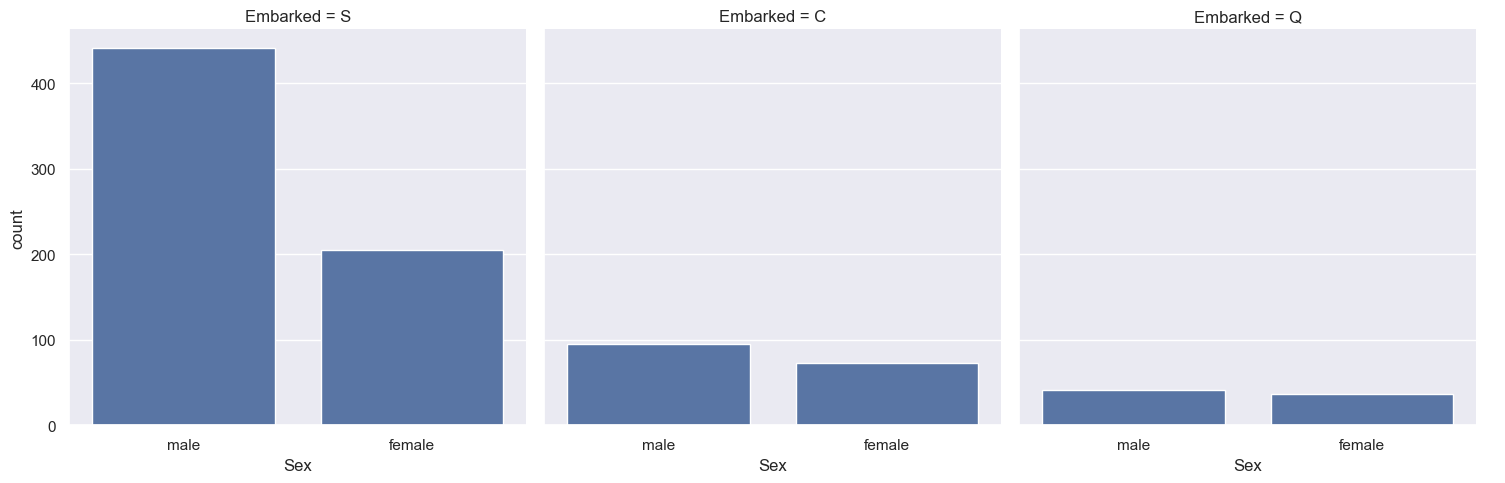

In [101]:
g=sns.catplot(x='Sex',col='Embarked',data=data,kind='count')

## Preparing data

In [104]:
data=pd.read_csv(r'C:\Users\prerana\Downloads\titanic_data.csv')

In [106]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [110]:
mean=data['Age'].mean()
std=data['Age'].std()

isnull=data['Age'].isnull().sum()

In [112]:
print(mean,std,isnull)

29.69911764705882 14.526497332334044 177


In [114]:
rand_age=np.random.randint(mean-std,mean+std,size=isnull)

In [116]:
rand_age

array([21, 27, 23, 36, 40, 33, 43, 31, 24, 39, 25, 21, 17, 41, 40, 15, 38,
       31, 42, 43, 15, 35, 27, 29, 33, 28, 37, 18, 22, 41, 34, 36, 39, 31,
       16, 36, 32, 42, 20, 20, 26, 29, 36, 42, 21, 30, 15, 38, 29, 31, 22,
       33, 25, 21, 41, 36, 41, 18, 26, 22, 32, 21, 20, 24, 38, 24, 34, 23,
       21, 27, 42, 37, 35, 40, 38, 26, 40, 25, 33, 15, 40, 19, 19, 34, 35,
       41, 22, 33, 29, 33, 30, 31, 16, 37, 17, 38, 20, 35, 41, 29, 31, 16,
       26, 29, 20, 29, 17, 35, 22, 28, 16, 28, 33, 33, 28, 26, 29, 28, 35,
       26, 30, 16, 28, 31, 33, 36, 27, 29, 22, 32, 23, 36, 38, 31, 36, 39,
       24, 31, 38, 28, 34, 20, 21, 17, 26, 33, 43, 30, 19, 31, 29, 34, 39,
       40, 36, 35, 27, 33, 19, 25, 23, 37, 29, 19, 33, 36, 26, 40, 15, 33,
       31, 40, 31, 21, 28, 23, 22])

In [118]:
a=data['Age'].copy()
a[np.isnan(a)]=rand_age

In [122]:
data['Age']=a

In [124]:
data['Age'].isnull().sum()

0

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [128]:
data['Embarked']=data['Embarked'].fillna('S')

In [130]:
col_to_drop=['PassengerId','Cabin','Ticket','Name']
data.drop(col_to_drop,axis=1,inplace=True)

In [132]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [134]:
gender={'male':0,'female':1}
data['Sex']=data['Sex'].map(gender)

In [136]:
ports={'S':0,'C':1,'Q':2}
data['Embarked']=data['Embarked'].map(ports)

In [138]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


## Splitting the data

In [141]:
x=data.drop(data.columns[[0]],axis=1)
y=data['Survived']

In [143]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=0)

## scaling

In [148]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
xtrain=sc_x.fit_transform(xtrain)
xtest=sc_x.transform(xtest)

## Classification

In [151]:
logreg=LogisticRegression()
svc_classifier=SVC()
dt_classifier=DecisionTreeClassifier()
knn_classifier=KNeighborsClassifier()
rf_classifier=RandomForestClassifier(n_estimators=1000)

In [153]:
logreg.fit(xtrain,ytrain)
svc_classifier.fit(xtrain,ytrain)
dt_classifier.fit(xtrain,ytrain)
knn_classifier.fit(xtrain,ytrain)
rf_classifier.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=1000)

In [155]:
logreg_ypred=logreg.predict(xtest)
svc_classifier_ypred=svc_classifier.predict(xtest)
dt_classifier_ypred=dt_classifier.predict(xtest)
knn_classifier_ypred=knn_classifier.predict(xtest)
rf_classifier_ypred=rf_classifier.predict(xtest)

In [159]:
from sklearn.metrics import accuracy_score

logreg_acc=accuracy_score(ytest,logreg_ypred)
svc_classifier_acc=accuracy_score(ytest,svc_classifier_ypred)
dt_classifier_acc=accuracy_score(ytest,dt_classifier_ypred)
knn_classifier_acc=accuracy_score(ytest,knn_classifier_ypred)
rf_classifier_acc=accuracy_score(ytest,rf_classifier_ypred)

In [161]:
print('Logistic regression : ',round(logreg_acc*100,2))
print('support vector : ',round(svc_classifier_acc*100,2))
print('decision tree : ',round(dt_classifier_acc*100,2))
print('K-NN classifier : ',round(knn_classifier_acc*100,2))
print('random forest : ',round(rf_classifier_acc*100,2))

Logistic regression :  79.48
support vector :  81.72
decision tree :  75.37
K-NN classifier :  80.97
random forest :  80.6
